<a href="https://colab.research.google.com/github/tsengcc2023/DeepGenerativeModels/blob/main/GradCam_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/mnist.npz')
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [ ]:
x_test_image  = data['x_test']
x_train_image = data['x_train']
y_test_label  = data['y_test']
y_train_label = data['y_train']

print(x_train_image.shape)
print(y_train_label.shape)
print(x_test_image.shape)
print(y_test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


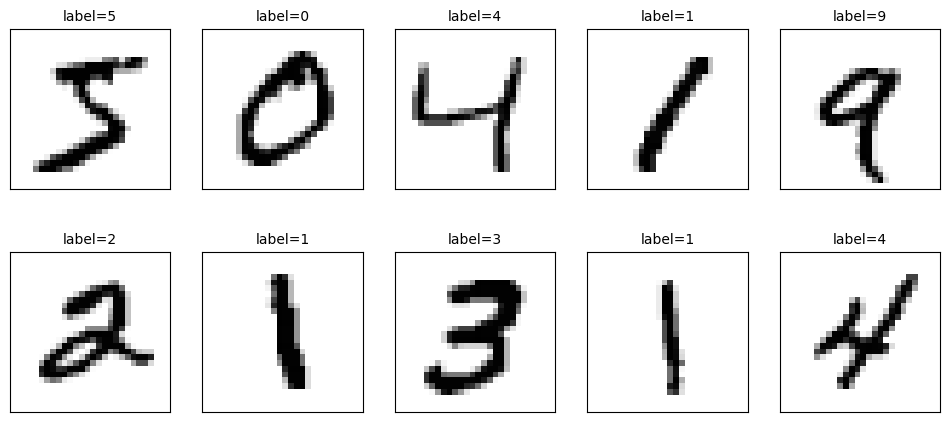

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,10):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(x_train_image[i], cmap='binary')
    title= "label=" +str(y_train_label[i])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
plt.show()

In [ ]:
# convert 2-D 28x28 image to 4-D nx28x28x1  array

x_Train4D=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')
x_Test4D=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')

In [ ]:
# normalize the image numbers to 0~1

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
print(x_Train4D_normalize.shape)
print(x_Test4D_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# convert label numbers to one-hot encoding

y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)

(60000, 10)
(10000, 10)


In [ ]:
from keras import Model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,GlobalAveragePooling2D

In [ ]:
# load HDF5 file
from keras.models import load_model

try:
    MnistModel = load_model('/content/drive/MyDrive/Colab Notebooks/MyMnistModel.hdf5')
    print("載入模型成功! 繼續訓練模型")
except :
    print("載入模型失敗! 開始訓練一個新模型")

載入模型成功! 繼續訓練模型


In [ ]:
print(MnistModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 global_average_pooling2d_1  (None, 36)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 10)                370       
                                                                 
Total params: 15222 (59.46 KB)
Trainable params: 15222

In [ ]:
print(MnistModel.layers)

[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7ab713907d30>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ab713907940>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7ab713906470>, <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ab713b37940>, <keras.src.layers.core.dense.Dense object at 0x7ab6f05ec4c0>]


In [ ]:
#View all layers
for lay in MnistModel.layers:
    print(lay.name)
    #print(lay.get_weights())

conv2d_1
max_pooling2d_1
conv2d_2
global_average_pooling2d_1
dense_1


In [ ]:
print(MnistModel.layers[0].name)
print(MnistModel.layers[1].name)
print(MnistModel.layers[2].name)
print(MnistModel.layers[3].name)
print(MnistModel.layers[4].name)

conv2d_1
max_pooling2d_1
conv2d_2
global_average_pooling2d_1
dense_1


In [ ]:
from tensorflow.keras import Model

In [ ]:
input_index = 7
x_input1 = x_Train4D_normalize[input_index,:,:]
x_input2 = np.reshape(x_input1,(1,28,28,1))
#prediction = MnistModel.predict_classes(x_input2)

predict_x=MnistModel.predict(x_input2)
classes_x=np.argmax(predict_x,axis=1)

print(x_input2.shape)

1/1 [==============================] - 0s 242ms/step
(1, 28, 28, 1)


In [ ]:
# Softmax layer and inference

model_output = MnistModel.get_layer("dense_1").output
m = Model(inputs=MnistModel.input, outputs=model_output)

print(m.predict(x_input2))
print(m.predict(x_input2).shape)
output_dense = m.predict(x_input2)[0,:]
print(output_dense)
inference_number = pd.Series(output_dense).idxmax()
print(inference_number)

1/1 [==============================] - 0s 60ms/step
[[1.0715237e-20 2.2060287e-17 6.1374523e-14 1.0000000e+00 8.9891058e-32
  7.2217067e-14 1.4877271e-33 6.7289123e-16 6.2274364e-14 4.7580226e-14]]
1/1 [==============================] - 0s 24ms/step
(1, 10)
1/1 [==============================] - 0s 20ms/step
[1.0715237e-20 2.2060287e-17 6.1374523e-14 1.0000000e+00 8.9891058e-32
 7.2217067e-14 1.4877271e-33 6.7289123e-16 6.2274364e-14 4.7580226e-14]
3


1/1 [==============================] - 0s 57ms/step
(1, 14, 14, 36)


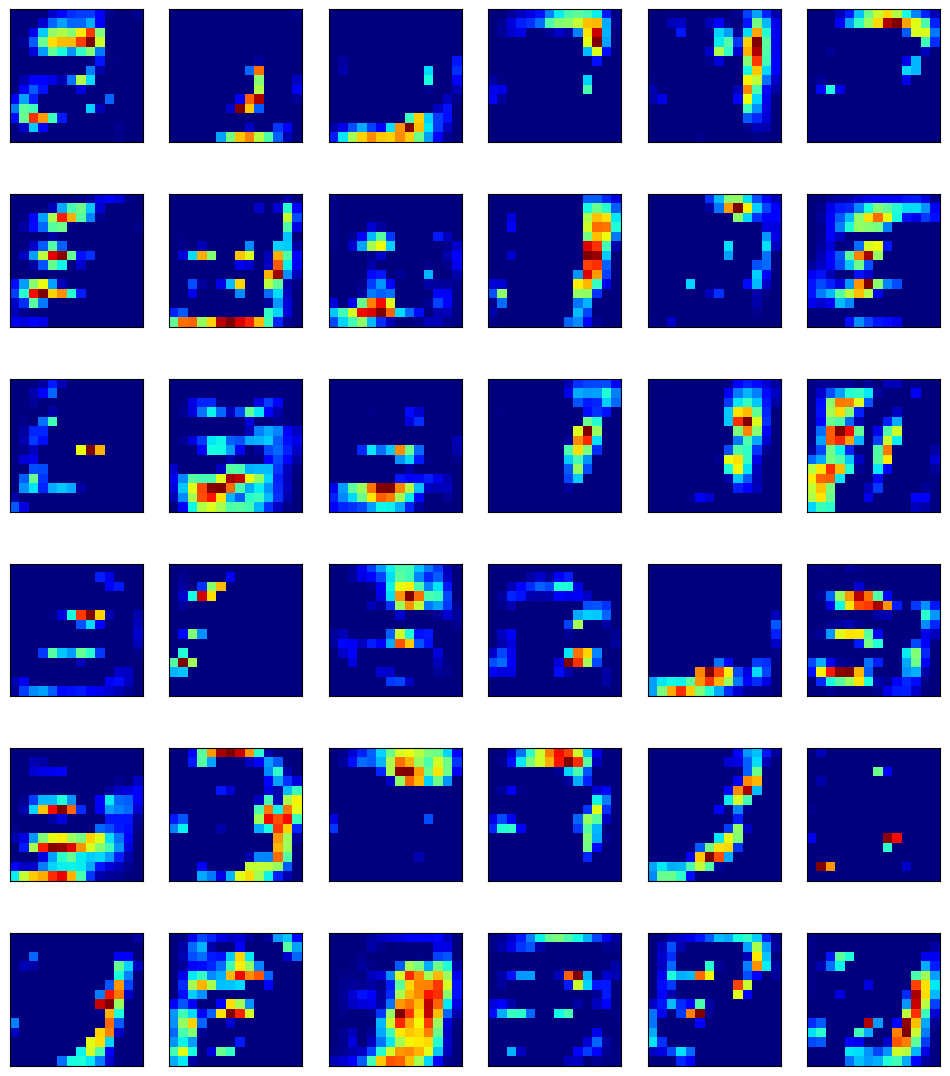

In [ ]:
import cv2
MnistModel_output = MnistModel.get_layer("conv2d_2").output
m = Model(inputs=MnistModel.input, outputs=MnistModel_output)
output_conv2d_2 = m.predict(x_input2)
print(output_conv2d_2.shape)
output_conv2d_2_np = np.reshape(output_conv2d_2,(14,14,36))

fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,36):
    ax=plt.subplot(6,6,1+i)
    tmp1 = output_conv2d_2_np[:,:,i]
    tmp2 = np.reshape(tmp1,(14,14))
    tmp3 = cv2.resize(tmp2, (28,28), interpolation=cv2.INTER_AREA)
    ax.imshow(tmp3, cmap='jet')
    ax.set_xticks([]);ax.set_yticks([])
plt.show()

In [ ]:
# Last conversion layer and GAP layer

print(MnistModel.layers[2].name)
wb_conv2d_2 = np.array(MnistModel.layers[2].get_weights())
print(wb_conv2d_2[0].shape)  # w numbers, (5x5)x16x36 = 14400
print(wb_conv2d_2[1].shape)  # b numbers, 36 and 14400 + 36 = 14436
print("----------------")
print(MnistModel.layers[3].name)
print(MnistModel.layers[3].get_weights())

conv2d_2
(5, 5, 16, 36)
(36,)
----------------
global_average_pooling2d_1
[]


<ipython-input-55-993a3fcfc992>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wb_conv2d_2 = np.array(MnistModel.layers[2].get_weights())


In [ ]:
# Get weights and Biases of the last dense layer

print(MnistModel.layers[4].name)
wb_dense = np.array(MnistModel.layers[4].get_weights())
print(wb_dense[0].shape)  # w numbers, 36x10 = 360
print(wb_dense[1].shape)  # b numbers, 10 and 10 + 360 = 370
print(wb_dense[0][:,inference_number])  # w numbers, 36x1 = 36
print(wb_dense[1][inference_number])  # b numbers, 1 and 1 + 36 = 37

dense_1
(36, 10)
(10,)
[ 0.5031573  -1.4770066  -1.2263483   0.05811129  0.89013845  0.07667753
  0.6419711   0.8513378  -0.57612884  0.7310981   0.54343045 -0.141235
 -1.809699    0.23889804 -0.73448837 -0.16083279  0.716383   -0.57513934
  0.20615494 -0.8465159   0.29833868  1.1303113   0.13114467  0.00900171
  0.3879396  -0.58848    -0.3601     -0.10693467  1.1848236   0.6043371
  0.50803363 -0.86779064 -0.04946211 -2.4941804  -0.25449014 -0.10085691]
-1.1167332


<ipython-input-56-69358147775c>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wb_dense = np.array(MnistModel.layers[4].get_weights())


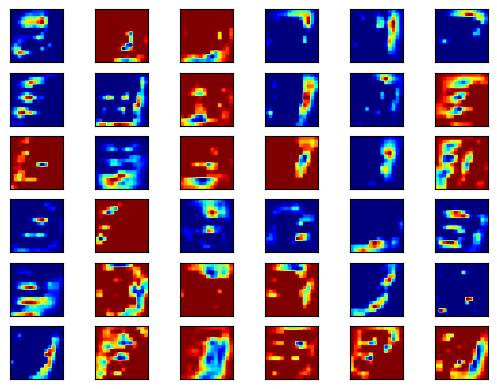

In [ ]:
# Calculate CAM = W*f(x,y)

heat_map = np.zeros((28,28))

for i in range(0,36):
    ax=plt.subplot(6,6,1+i)
    tmp1 = output_conv2d_2_np[:,:,i]
    tmp2 = np.reshape(tmp1,(14,14))
    tmp3 = cv2.resize(tmp2, (28,28), interpolation=cv2.INTER_AREA)
    tmp4 = wb_dense[0][i,inference_number] * tmp3
    heat_map[:,:] = heat_map[:,:] + tmp4[:,:]
    ax.imshow(tmp4, cmap='jet')
    ax.set_xticks([]);ax.set_yticks([])
plt.show()

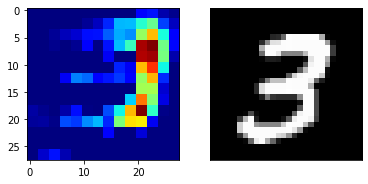

In [ ]:
ax=plt.subplot(1,2,1)
heat_map = np.maximum(heat_map,0)
ax.imshow(heat_map, cmap='jet')
x_tmp = np.reshape(x_input1,(28,28))
ax=plt.subplot(1,2,2)
ax.imshow(x_tmp, cmap='gray')
ax.set_xticks([]);ax.set_yticks([])
plt.show()